# CS767 A1 Advanced ML & NN
## LAB 02: Review of Calculus, Backpropagation, Logistic Regression
### 09/14/2023 

References: Lecture Notes \ Planar data classification with one hidden layer - Andrew Ng \ https://towardsdatascience.com/where-did-the-binary-cross-entropy-loss-function-come-from-ac3de349a715




In [1]:
!pip install -U scikit-learn

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
# %tensorflow_version 2.x
import tensorflow as tf

# CALCULUS REVIEW


**Slope**

How does a change in $x$ affect $y$

$$ slope = \frac{rise}{run} = \frac{change \: in \: y}{change \:in \: x}
= \frac{y_1 - y_0}{x_1- x_0}
$$ 

----

**Derivative - definition:** 


$$ \frac{d}{dx}f(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$$


Example: 
$$f(x) = 3x^2 \\
f^{'}(x) = \frac{d}{dx}3x^2  = \lim_{h \to 0} \frac{3(x+h)^2 - 3x^2}{h} \\
= \lim_{h \to 0}\frac{3x^2+6xh+3h^2-3x^2}{h} \\
= \lim_{h \to 0}\frac{6xh+3h^2}{h} \\
= \lim_{h \to 0}\frac{6x\require{cancel} \cancel{h}+3\require{cancel} \cancelto{h}{h^2}}{\require{cancel} \cancel{h}} \\
= \lim_{h \to 0}{6x+3 \require{cancel} \cancelto{0}{h}} \\
= 6x \\
$$
Intuition: When $x$ goes up by 1 unit, $y$ goes by 6 units 

---

**Partial Derivative:**

Take derivative with respect to named variable and treat other variables as constants. 

Example:
$$f(x, y,z) = z = x^2y + xy^3 + z$$

If we don't change $y$, how does change in $x$, affect $z$. In other words find $\frac{\partial f}{\partial x} $

$$\frac{\partial f}{\partial x}  = 2xy + y^3 $$

If we don't change $x$, how does change in $y$, affect $z$. In other words find $\frac{\partial f}{\partial y} $
$$\frac{\partial f}{\partial y}  = x^2 + 3xy^2$$ 

----

**Gradient**
$$\nabla (f)= \frac{\partial f}{\partial x} \hat{i} + \frac{\partial f}{\partial y} \hat{j}+ \frac{\partial f}{\partial z} \hat{k} = \frac{\partial f}{\partial x} \hat{x} + \frac{\partial f}{\partial y} \hat{y}+ \frac{\partial f}{\partial z} \hat{z}$$



**Inverse Function**

Suppose a function $f$ maps x $\rightarrow$ y, then inverse $f^{-1}$ maps $y \rightarrow x $  

This means: 

$$f^{-1}(f)= x$$  


Example:
$$f(x) = y = x^2 \\
f^{-1}(y) =y^{1/2} \\
f^{-1}(f) = (x^2)^{1/2} = x
$$

---

**Derivative of Inverse Function** 

 $$ f' = \frac{dy}{dx} \\
(f^{-1})' = \frac{1}{\frac{dy}{dx}} = (\frac{dy}{dx})^{-1}\\
$$

---
**Plot $f(x, y) = z = x^2y + xy^3$**

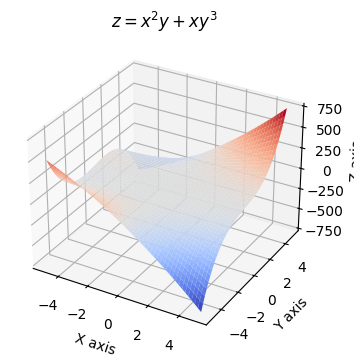

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
#from numpy import * # cheat to import all numpy functions without needing to type np. everything, usually no conflicts
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = (X**2)*Y + X*Y**3

figure = plt.figure(1, figsize = (12, 4))
subplot3d = plt.subplot(111, projection='3d')
surface = subplot3d.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0.1) #also can just write cmap = 'coolwarm'
plt.title(r'$z = x^2y + xy^3$')  # use r'' to engage latex notation for a string
subplot3d.set_xlabel('X axis')
subplot3d.set_ylabel('Y axis')
subplot3d.set_zlabel('Z axis')
plt.show()

___
**Plot $\frac{\partial f}{\partial x}  = 2xy + y^3 $**

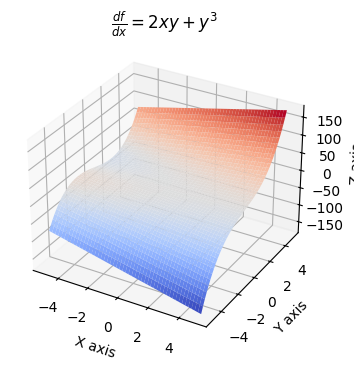

In [7]:
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = 2*X*Y + Y**3

import matplotlib

figure = plt.figure(1, figsize = (12, 4))
subplot3d = plt.subplot(111, projection='3d')
surface = subplot3d.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0.1)
plt.title(r'$\frac{df}{dx} = 2xy + y^3$')
plt.xlabel('X axis')
plt.ylabel('Y axis')
subplot3d.set_zlabel('Z axis')
plt.show()

---
**Plot $\frac{\partial f}{\partial y}  = x^2 + 3xy^2$**

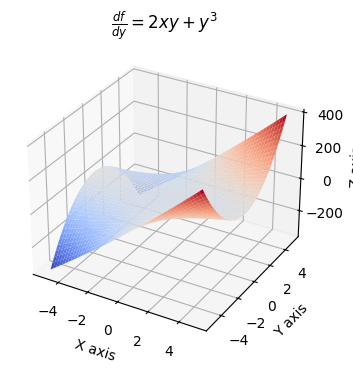

In [8]:
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = X**2 + 3*X*Y**2
figure = plt.figure(1, figsize = (12, 4))
subplot3d = plt.subplot(111, projection='3d')
surface = subplot3d.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0.1)
plt.title(r'$\frac{df}{dy} = 2xy + y^3$')
subplot3d.set_xlabel('X axis')
subplot3d.set_ylabel('Y axis')
subplot3d.set_zlabel('Z axis')
plt.show()

---
**Plot $\frac{\partial f}{\partial y}  = x^2y + xy^3$**

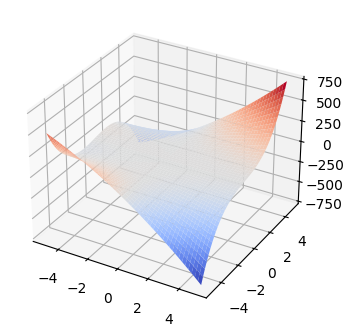

In [9]:
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = (X**2)*Y + X*Y**3

figure = plt.figure(1, figsize = (12, 4))
subplot3d = plt.subplot(111, projection='3d')
surface = subplot3d.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0.1)
plt.show()

---
**Product Rule**

$$ (f.g)^{'} = f^{'}g + fg^{'}$$

Example: 
$$f(x) = (4x^2+x)(x^3+8x^2)$$
$$f^{'}(x) = (8x+1)(x^3+8x^2) + (4x^2+x)(3x^2+16x)$$

---
**Chain Rule**

$$ F^{'}(x) = f^{'}(g(x)) g^{'}(x)$$

If $y = f(u)$ and  $u = g(x)$,  then $\frac{dy}{dx} = \frac{dy}{du}\frac{du}{dx}$

Example: 
$$f(x) = \sin(3x^2+x) = \sin(g(x))$$
$$f^{'}(x) = \cos(g(x))g'(x) = \cos(3x^2+x)(6x+1)$$

---
---
# Using Tensorflow

For autodifferentiation to properly work we need to calculate the gradients and remember the order they were calculated during forward propagation. For backpropagation we follow the operations in the reverse order.

In [11]:
@tf.function
def get_derivative(x):
  with tf.GradientTape() as tape:  #GradientTape records operations for automatic differentiation
    tape.watch(x)  # Ensures that tensor is being traced by this tape.
    y = 3*tf.pow(x, 2)
  dy_dx = tape.gradient(y,x)
  return dy_dx

The `tf.GradientTape` function records the relevant operations executed within the context in which the function is called, here the `with` session, onto a `tape`. 

In [12]:
x = tf.constant(2.0)
get_derivative(x)

2023-09-19 15:47:33.144535: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


<tf.Tensor: shape=(), dtype=float32, numpy=12.0>

To see just the value of th `tf.Variable` use `.numpy()` method.

In [13]:
x.numpy()

2.0

What did we do? Defined $y = 3 x^2$ and the derivative as $y' = 6x$, so that $y'(2) = 6*2 = 12$


In [14]:
# We could go through same calculations without 
# defining a TF function, like:
x = tf.Variable(2.0 )
with tf.GradientTape() as tape:
  # tape.watch(x)
  y = 3*tf.pow(x, 2) 
dy_dx = tape.gradient(y, x) 

print( dy_dx)

tf.Tensor(12.0, shape=(), dtype=float32)


By default, the resources held by a GradientTape are released as soon as `GradientTape.gradient()` method is called. To compute multiple gradients over the same computation, create a persistent gradient tape. For individual operations and test like we are doing here, the memory consumed by a persistent tape is negligible. However, for many calculations persisting the tape can have an effect if memory is not flushed and we shoudl do it with care.

In [15]:
a = tf.Variable(6.0, trainable=True)
b = tf.Variable(2.0, trainable=True)
# with tf.GradientTape() as tape:
with tf.GradientTape(persistent=True) as tape:  # the purpose of persistence to call the gradient multiple times
    y1 = a ** 2
    y2 = b ** 3
                                                                                                                                                                                                                                                                                                                                                
print(tape.gradient(y1, a).numpy())
print(tape.gradient(y2, b).numpy())

12.0
12.0


The default behavior is to record all operations after accessing a trainable `tf.Variable`. The reasons for this are:
* The tape needs to know which operations to record in the forward pass to calculate the gradients in the backwards pass.
* The tape holds references to intermediate outputs, so you don't want to record unnecessary operations.
* The most common use case involves calculating the gradient of a loss with respect to all a model's trainable variables.

For example the following fails to calculate a gradient because the `tf.Tensor` is not "watched" by default, and the `tf.Variable` is not trainable:

In [16]:
# A trainable variable
x0 = tf.Variable(3.0, name='x0')
# Not trainable
x1 = tf.Variable(3.0, name='x1', trainable=False)
# Not a Variable: A variable + tensor returns a tensor.
x2 = tf.Variable(2.0, name='x2') + 1.0
# Not a variable
x3 = tf.constant(3.0, name='x3')

with tf.GradientTape() as tape:
  y = (x0**2) + (x1**2) + (x2**2)

grad = tape.gradient(y, [x0, x1, x2, x3])

for g in grad:
  print(g)

tf.Tensor(6.0, shape=(), dtype=float32)
None
None
None


In [17]:
[var.name for var in tape.watched_variables()]

['x0:0']

NB: TF formatting has become much simpler in recent years, so you can use standard pythonic formating as opposed to explicit functions for each operation, e.g., `x**2` instead of `tf.pow(x,2)`

In [18]:
try:
  with tf.GradientTape() as tape:
    tape.watch(x) 
    y = 3*x**2 
  dy_dx = tape.gradient(y, x) 
  assert dy_dx is not None
  print('dx_dy is:', dy_dx.numpy())
except:
  print('dx_dy is:', dy_dx)

dx_dy is: 12.0


**Example with constant not define**

In [19]:
x = tf.constant (2.0)
try:
  with tf.GradientTape() as tape:
#     tape.watch(x) # toggle the comment in and out to see the effect
    y = 3*x**2 
  dy_dx = tape.gradient(y, x) 
  assert dy_dx is None
  print('dx_dy is', dy_dx)
except:
    pass
    print('dx_dy is', dy_dx)

dx_dy is None


**Second order**

In [20]:
@tf.function
def get_second_derivative(x):
  with tf.GradientTape() as tape:
    tape.watch(x)
    with tf.GradientTape() as t:
      t.watch(x)
      y = x**2 + x
    dx_dy = t.gradient(y,x)
  d2x_dy = tape.gradient(dx_dy, x)
  return dx_dy, d2x_dy

In [21]:
x = tf.constant (3.0)
dx_dy, d2x_dy = get_second_derivative(x)
print(dx_dy)
print(d2x_dy)

tf.Tensor(7.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)


What did we do? Define $y = x^2 + x$, differentiation then calculates the derivateives. Note that TF crowd cal all derivates the gradients. 

$y' = 2x + 1$ and $y'' = 2$

Insert the value $x=2$ to get $y'(2) = 2\cdot2+1=5$ and $y''(2) = 2$

In [22]:
# persistent
x = tf.Variable (2.0 )
y = tf.Variable (2.0 )
with tf.GradientTape(persistent=True) as tape:
  tape.watch(x)
  z = x**2 + y*x
dz_dx = tape.gradient(z, x)
dz_dy = tape.gradient(z, y)
del tape
print(dz_dx)
print(dz_dy)

tf.Tensor(6.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)


In [23]:
dz_dx

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [24]:
dz_dy

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

# Computation Graphs

![Computation Graphs](https://drive.google.com/uc?export=view&id=1wXSeGQ_oFJ5awfI8TSAQUQldMY4WTdD_)





























---
**Equation 1:** $z = xy+ 1/x = a + b$, given $x =1, y = 2$ 

![title](eq1.png)


**Compute forward and cache derivatives simultaneously at each node**

for $a$

$$a\bigg|_{x=1, y=2} = xy\bigg|_{x=1, y =2} = 2 \\
\frac{\partial a}{\partial y}  = x =1\: ,\ \ \ \ \frac{\partial a}{\partial x}  = y =2$$ 

for $b$
$$b = \frac{1}{x} = 1 \\ 
\frac{\partial b}{\partial x}\bigg|_{x=1}  = -\frac{1}{x^2}\bigg|_{x=1} = -1$$ 

for $z$
$$z = a + b $$

$$ z \bigg|_{a=2, b =1} = 2 + 1 = 3$$

$$\frac{\partial z}{\partial a} = 1, \: \: \frac{\partial z}{\partial b} = 1$$ 

Finally: 
$$\frac{\partial z}{\partial x} = \frac{\partial z}{\partial a} * \frac{\partial a}{\partial x} + \frac{\partial z}{\partial b} * \frac{\partial b}{\partial x} =
(1*2) + (1*-1) =1$$ 

$$\frac{\partial z}{\partial y} = \frac{\partial z}{\partial a} * \frac{\partial a}{\partial y}  =
(1*1) =1$$

---

**Equation 2:** $z =  \frac{x+y}{x^2-4}$, given $x =1, y = 2$ 

![title](eq2.png)

**Compute forward and cache derivatives simultaneously at each node**

for $a$

$$a\bigg|_{x=1, y=2} = x + y\bigg|_{x=1, y =2} = 3 \\
\frac{\partial a}{\partial y}  =1\: , \frac{\partial a}{\partial x}  = 1$$ 

for $b$

$$b\bigg|_{x=1} = (x^2-4)\bigg|_{x=1} = -3 \\
\frac{\partial b}{\partial x}\bigg|_{x=1} = 2x\bigg|_{x=1} =2$$ 

for $z$

$$z = \frac{a}{b}$$
$$ z \bigg|_{a=3, b =-3} = \frac{3}{-3} = -1$$ 
$$\frac{\partial z}{\partial a} = \frac{1}{b} = -\frac{1}{3}; \: \: \frac{\partial z}{\partial b} = \frac{-a}{b^2} = -\frac{1}{3}$$

Finally: 

$$\frac{\partial z}{\partial x} = \frac{\partial z}{\partial a} * \frac{\partial a}{\partial x} + \frac{\partial z}{\partial b} * \frac{\partial b}{\partial x} =
(-\frac{1}{3} *1) + (-\frac{1}{3}*2) =-1$$ 

$$\frac{\partial z}{\partial y} = \frac{\partial z}{\partial a} * \frac{\partial a}{\partial y}  =
(-\frac{1}{3}*1) =-\frac{1}{3}$$ 


---

**Equation 3:** $z =  \frac{2x+\frac{1}{x}}{x+y}$, given $x =1, y = 2$ 

![title](eq3.png)

**Compute forward and cache derivatives simultaneously at each node**

for $a$

$$a\bigg|_{x=1, y=2} = 2x \bigg|_{x=1, y =2} = 2 \\
\frac{\partial a}{\partial y}  =0\: , \frac{\partial a}{\partial x}  = 2$$  

for $b$

$$b\bigg|_{x=1} = \frac{1}{x}\bigg|_{x=1} = 1 \\
\frac{\partial b}{\partial x}\bigg|_{x=1} = -\frac{1}{x^2}\bigg|_{x=1} =-1$$  

for $c$

$$c = x + y$$
$$ c \bigg|_{x=1, y =2} = 1 + 2 = 3$$ 
$$\frac{\partial c}{\partial x} = 1 ; \: \: \frac{\partial c}{\partial y} = 1$$


for $d$

$$d = a + b$$
$$ d \bigg|_{a=2, b =1} = 2+ 1 = 3$$ 
$$\frac{\partial d}{\partial a} = 1 ; \: \: \frac{\partial d}{\partial b} = 1$$


$$\frac{\partial d}{\partial x} = \frac{\partial d}{\partial a} * \frac{\partial a}{\partial x} +  \frac{\partial d}{\partial b} * \frac{\partial b}{\partial x} =(1*2) + (1*-1) = 1$$

for $z$

$$z = \frac{d}{c}$$
$$ z \bigg|_{c=3, d =3} = \frac{3}{3} = 1$$
$$\frac{\partial z}{\partial d} = \frac{1}{c} = \frac{1}{3}; \: \: \frac{\partial z}{\partial c} = \frac{-d}{c^2} = -1$$

Finally: 


$$\frac{\partial z}{\partial x} = \frac{\partial z}{\partial d} * \frac{\partial d}{\partial x} + \frac{\partial z}{\partial c} * \frac{\partial c}{\partial x} =(-1 *1) + (-1 *1) =-2$$ 

$$\frac{\partial z}{\partial y} = \frac{\partial z}{\partial c} * \frac{\partial c}{\partial y}  =
(-1*1) =-1$$ 



---
# LOGISTIC REGRESSION
In this section we will use neural networks to solve a Logistic Regression Problem. We will use standard python libraries to implement the neural network from scratch
 

Logistical Regression solves the following problem: given an input $X \in \mathbb{R}^{m\times n}$ where $m$ is the number of samples and $n$ is the size of input, find $\hat{y}$ in $Y \in \mathbb{R}^{1\times m}$ such that probability of y=1, given x:
$$\hat y = P(y =1 | x)$$


$$ X \in \mathbb{R}^{m\times n_{x}} =
\underbrace{
\begin{bmatrix}
x_1^{(1)} & x_1^{(2)} & x_1^{(3)} & x_1^{(4)} & \cdots & x_1^{(m)}\\
x_2^{(1)} & x_2^{(2)} & x_2^{(3)} & x_2^{(4)} & \cdots & x_2^{(m)}\\
x_3^{(1)} & x_3^{(2)} & x_3^{(3)} & x_3^{(4)} & \cdots & x_3^{(m)}\\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots\\
x_n^{(1)} & x_n^{(2)} & x_n^{(3)} & x_n^{(4)} & \cdots & x_n^{(m)}\\
\end{bmatrix}}_{\displaystyle m}
\left.\vphantom{\begin{bmatrix}
x_1^{(1)} & x_1^{(2)} & x_1^{(3)} & x_1^{(4)} & \cdots & x_1^{(m)}\\
x_2^{(1)} & x_2^{(2)} & x_2^{(3)} & x_2^{(4)} & \cdots & x_2^{(m)}\\
x_3^{(1)} & x_3^{(2)} & x_3^{(3)} & x_3^{(4)} & \cdots & x_3^{(m)}\\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots\\
x_n^{(1)} & x_n^{(2)} & x_n^{(3)} & x_n^{(4)} & \cdots & x_n^{(m)}\\
\end{bmatrix}}\right\}n_x$$


$$ Y \in \mathbb{R}^{1\times m} =
\underbrace{
\begin{bmatrix}
y^{(1)} & y^{(2)} & y^{(3)} & y^{(4)} & \cdots & y^{(m)}\\
\end{bmatrix}}_{\displaystyle m}
\left.\vphantom{\begin{bmatrix}
y^{(1)} & y^{(2)} & y^{(3)} & y^{(4)} & \cdots & y^{(m)}\\
\end{bmatrix}}\right\}1$$

$$w \in \mathbb{R}^{n_{x}} $$


$$b \in \mathbb{R} $$

---
## Loss Function: Intuition

![Linera Regression](https://drive.google.com/uc?export=view&id=1j4kRMNeNqe76Xtva-Sar_O9uaX9siDTh)

---
## Binary Classification

We make the following assumptions:
1. There are 2 classes in the dataset. Each sample in the dataset belongs to one class or the other but not to both. For example, in classifying whether an image is a cat or dog, every image is either a cat or dog and not a girafe
2. Each class is independent of the other class. For example, classifying an image as a cat, does not affect the classification of the next sample. (independent and identically distributed) [Wikipedia: Independent and identically distributed random variables](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables)
3. All samples are generated from the same distribution. For example, if we train the network with images of cats and dogs, then all images should images of cats and dogs and not others from hotels and bridges

---
# Forward Propagation

$$z=w_1x_1+w_2x_2+b \\
a = \hat y = \sigma(z) \:\:  where \:\:  \sigma = \frac{1}{1+e^{-z}} $$ 


$a$ is the range of $0$ to 1. If prob > 0.5, assign to 1 else assign to 0


---
## Cost Function

With these assumptions in place, the loss of a single training sample can be calculated as follows: 

$$\text{Binary Cross Entropy Loss} = -y_i\log(\hat y_i)-(1-y_i)\log(1-\hat y_i))$$ 

where $i$ is the $i^{th}$ training sample and  $\hat y = P(y =1 | x)$, probability that y =1 , given x.

**The total loss for all training samples** 

$$J(w)=L(\hat y, y)= -\frac{1}{m}\sum_{i=1}^m{(y_i\log(\hat y_i)+(1-y_i)\log(1-\hat y_i))}$$  

 is the sum of losses of all samples where $m$ is the total number of training samples in the dataset. We also the scale the loss by the number of training samples $m$

---
# Gradient Descent

![alt text](https://drive.google.com/uc?export=view&id=1ggATcM-i81yEPjWPvXfdAMxNoPSL6M5I)

1. Randomly initialize $w_1, w_2 \: and \: b $
2. Select learning rate $\alpha$ 

3. Update $w_1, w_2 \: and \: b $ for all $m$ samples:
$$w_1 = w_1 - \alpha \frac{\partial L}{\partial w_1} = w_1-\alpha(a-y)x_1$$
$$w_2 = w_2 - \alpha \frac{\partial L}{\partial w_2} = w_2-\alpha(a-y)x_2$$
$$b = b - \alpha \frac{\partial L}{\partial b} = w_1-\alpha(a-y)$$



---
# Backward Propagation

$$\frac{\partial L}{\partial a}  = \frac{\partial }{\partial a}[-y\log(a)-(1-y)\log(1-a)] = -y \frac{1}{a} - (-1)\frac{1-y}{1-a} = \frac{-y}{a} + \frac{1-y}{1-a} \: $$ 

$$\frac{\partial L}{\partial z} = \frac{\partial L}{\partial a} * \frac{\partial a}{\partial z} $$ 

$\text{Recall} \: a = \sigma (z) \: \text{and from  Lecture} \:\: \frac{d}{dz}[\sigma(z)] = \frac{\partial a}{\partial z} = (1-\sigma(z))\sigma(z)$ such that $\frac{\partial a}{\partial z}= (1-a)a $

Therefore $\:  \frac{\partial L}{\partial z} = [\frac{-y}{a} + \frac{1-y}{1-a}](1-a)a 
=[\frac{-y}{a}](1-a)a + [\frac{1-y}{1-a}](1-a)a 
= -y(1-a) + (1-y)a 
= -y +ay+a -ay \\
=a-y \:\: 
$

$$\frac{dz}{dw_1} = x_1$$ 

$\frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial a} * \frac{\partial a}{\partial z} * \frac{\partial z}{\partial w_1} 
= [\frac{-y}{a} + \frac{1-y}{1-a}]*[(1-a)a]*x_1 
= [-y(1-a) + a(1-y)]x 
= [-y +ay + a -ay]x \\
\;\;\;\;\;\;=(a-y)x \:\: [Equation 1]
$


$$\frac{dz}{db} = 1$$ 

$\frac{\partial L}{\partial b} = \frac{\partial L}{\partial a} * \frac{\partial a}{\partial z} * \frac{\partial z}{\partial b} 
= [\frac{-y}{a} + \frac{1-y}{1-a}]*[(1-a)a]*1 
= [-y(1-a) + a(1-y)] 
= [-y +ay + a -ay] \\
\;\;\;\;\;\;=(a-y) \:\: [Equation 2]
$

---
# Implemention

![alt text](https://drive.google.com/uc?export=view&id=185am24W4f7rgJXosnbpESMsBkjQofBLp)


For our example of a logistic problem we will examine the commonly used flower classification problem. The dataset considers three types of irides (iris) but we will only consider two here.

![title](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

In [25]:
iris = datasets.load_iris()

In [26]:
X = iris.data[:, :2] # use only 2 features
y = (iris.target != 0) * 1 # force to 2 classes
# y = iris.target

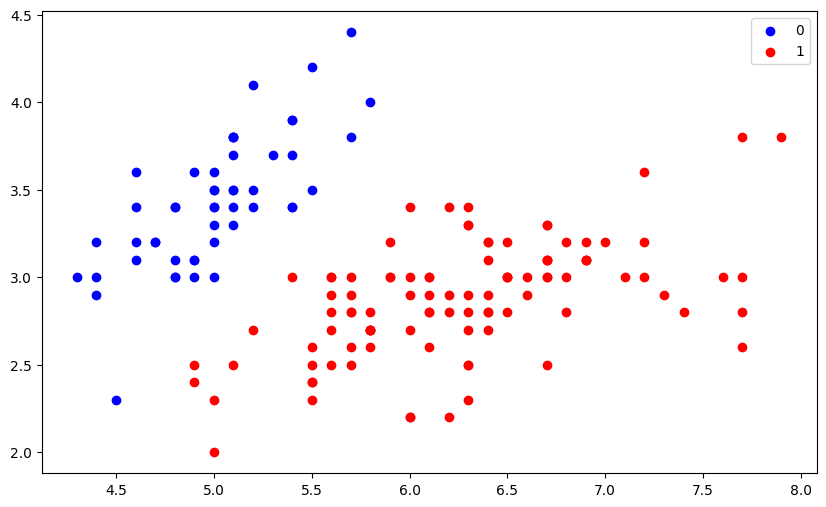

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
# plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color='k', label='2')
plt.legend();

In [28]:
X.shape

(150, 2)

In [29]:
X = X.T
X.shape

(2, 150)

In [30]:
y.shape

(150,)

In [31]:
y = y.reshape(1, 150)
y.shape

(1, 150)

---
# Implement Sigmoid

In [32]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

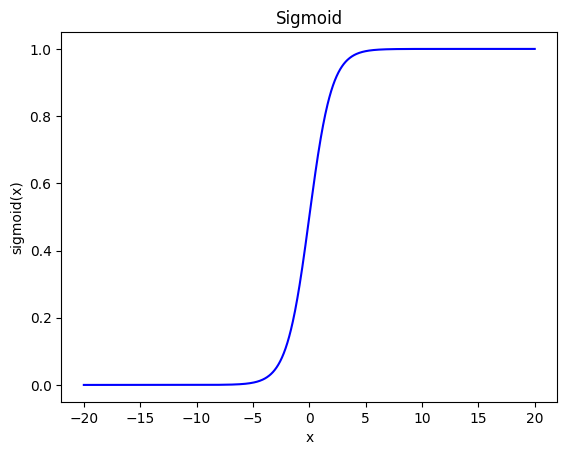

In [33]:
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(-20,20,1000)
plt.plot(x,sigmoid(x),'b',)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid')
plt.show()

Text(0.5, 1.0, 'Hyperbolic Tangent')

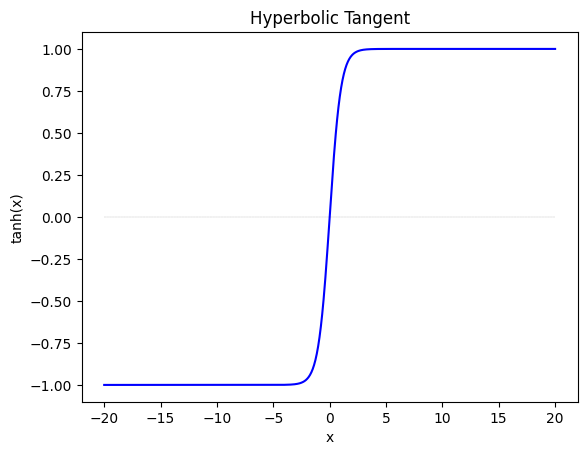

In [34]:
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(-20,20,1000)
plt.plot(x,np.tanh(x),'b',)
plt.plot([-20,20],[0,0],'k--',linewidth=0.1)
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.title('Hyperbolic Tangent')

---
# Define Parameters

In [35]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer   
    return (n_x, n_h, n_y)


In [36]:
n_x, n_h, n_y = layer_sizes(X, y)
print(n_x)
print(n_h)
print(n_y)

2
4
1


In [37]:
def model(x_train, y_train, num_layers):
  n_x = x_train.shape[0] # size of x
  n_h = num_layers
  n_y = y_train.shape[0] # output size
  return (n_x, n_h, n_y)

In [38]:
n_x, n_h, n_y = model(x_train = X, y_train = y, num_layers=4)
print(n_x)
print(n_h)
print(n_y)

2
4
1


---
# Initialize Weights

1. We do not want to initialize the weights, $w$, to all the hiddens units in a symmetric way, otherwise they will compute the same function
2. Initialize $w$ to a small but non-zero, random value


In [39]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    
    W1 = 0.01 * np.random.randn(n_h,n_x)  # random normal distribution
    b1 = np.zeros((n_h,1))
    W2 = 0.01 * np.random.randn(n_y,n_h) 
    b2 = np.zeros((n_y,1))
    
    
    assert (W1.shape == (n_h, n_x)) # assert gives an error, as opposed to just passing False forward
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {'W1': W1,
                  'b1': b1,
                  'W2': W2,
                  'b2': b2}
    
    return parameters

In [40]:
parameters = initialize_parameters(n_x, n_h, n_y)

In [41]:
print(parameters['W1'].shape)
print(parameters['b1'].shape)
print(parameters['W2'].shape)
print(parameters['b2'].shape)

(4, 2)
(4, 1)
(1, 4)
(1, 1)


In [42]:
parameters['b2']

array([[0.]])

In [43]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
   
    # Implement Forward Propagation to calculate A2 (probabilities)
    
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {'Z1': Z1,
             'A1': A1,
             'Z2': Z2,
             'A2': A2}
    
    return A2, cache

In [44]:
A2, cache = forward_propagation(X = X, parameters = parameters)

In [45]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1 - A2),1 - Y)
    cost = - np.sum(logprobs) * (1 / m) 
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect,  remove single-dimensional entries from the shape of an array
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [46]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    
    W1 = parameters['W1']
    W2 = parameters["W2"]
    
        
    # Retrieve also A1 and A2 from dictionary "cache".
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    
    dZ2= A2 - Y
    dW2 = 1 / m *(np.dot(dZ2,A1.T))
    db2 = 1 / m *(np.sum(dZ2,axis = 1,keepdims = True))
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1, 2))
    dW1 = 1 / m *(np.dot(dZ1,X.T))
    db1 = 1 / m *(np.sum(dZ1,axis = 1,keepdims = True))
    
    
    grads = {'dW1': dW1,
             'db1': db1,
             'dW2': dW2,
             'db2': db2}
    
    return grads

In [47]:
grads = backward_propagation(parameters, cache, X, y)
print ('dW1 =', (grads["dW1"]))
print ('db1 =', (grads["db1"]))
print ('dW2 =', (grads["dW2"]))
print ('db2 =', (grads["db2"]))

dW1 = [[ 0.01324219  0.00407888]
 [ 0.01126041  0.00345553]
 [-0.0067562  -0.00207384]
 [-0.02872369 -0.00885145]]
db1 = [[ 0.00176134]
 [ 0.00149579]
 [-0.00089779]
 [-0.00382111]]
dW2 = [[ 0.00543696  0.0203641   0.02552417 -0.00149351]]
db2 = [[-0.16665708]]


In [48]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
   
    
    # Retrieve each gradient from the dictionary "grads"
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    
    # Update weights
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [49]:
parameters1 = initialize_parameters(n_x, n_h, n_y)

In [50]:
parameters2 = update_parameters(parameters1, grads)

print("W1 = " + str(parameters1["W1"]))
print("b1 = " + str(parameters1["b1"]))
print("W2 = " + str(parameters1["W2"]))
print("b2 = " + str(parameters1["b2"])+'\n')


print("W1 = " + str(parameters2["W1"]))
print("b1 = " + str(parameters2["b1"]))
print("W2 = " + str(parameters2["W2"]))
print("b2 = " + str(parameters2["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]

W1 = [[-0.0200582  -0.00545732]
 [-0.03487445  0.01225607]
 [-0.00982692 -0.00592886]
 [ 0.03949725 -0.00183115]]
b1 = [[-0.0021136 ]
 [-0.00179495]
 [ 0.00107735]
 [ 0.00458533]]
W2 = [[-0.01710387 -0.03352699 -0.02511446  0.02471429]]
b2 = [[0.1999885]]


In [51]:
def model(X, Y, n_h, lr=1.2, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    
    parameters = initialize_parameters(n_x,n_h,n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    
    # Loop (gradient descent)
    history = {}

    for i in range(0, num_iterations):
         
        
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X,parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads,learning_rate = lr)
        
       
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [52]:
parameters= model(X, y, 10, 0.3, num_iterations=10000, print_cost=True) # change lr and nh
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0: 0.693204
Cost after iteration 1000: 0.025059
Cost after iteration 2000: 0.015755
Cost after iteration 3000: 0.009499
Cost after iteration 4000: 0.006349
Cost after iteration 5000: 0.004659
Cost after iteration 6000: 0.003628
Cost after iteration 7000: 0.002941
Cost after iteration 8000: 0.002454
Cost after iteration 9000: 0.002093
W1 = [[-1.02202424  0.97772223]
 [-1.26768132  1.18617301]
 [-1.1146896   1.0625463 ]
 [-0.64621207  0.61556561]
 [-1.06879083  1.02047006]
 [ 0.6041729  -0.57229847]
 [-0.71235961  0.6803325 ]
 [-0.71069748  0.67949261]
 [-1.04218139  0.99823128]
 [-0.83412141  0.79859561]]
b1 = [[ 2.39663245]
 [ 3.06832208]
 [ 2.63379976]
 [ 1.47124135]
 [ 2.51659842]
 [-1.37302989]
 [ 1.63367784]
 [ 1.62742226]
 [ 2.44266725]
 [ 1.93208879]]
W2 = [[-2.66298334 -3.41657009 -2.92446498 -1.64723135 -2.79465636  1.53874072
  -1.82476362 -1.81850193 -2.71492865 -2.15218354]]
b2 = [[-1.22478234]]


In [53]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    
    A2, cache = forward_propagation(X,parameters)
    predictions = (A2 > 0.5)   
    
    return predictions

In [54]:
predictions = predict(parameters, X)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


In [55]:
parameters = model(X, y, n_h = 4, num_iterations = 10000, print_cost=True)

Cost after iteration 0: 0.693011
Cost after iteration 1000: 0.636519
Cost after iteration 2000: 0.636516
Cost after iteration 3000: 0.636515
Cost after iteration 4000: 0.636515
Cost after iteration 5000: 0.636515
Cost after iteration 6000: 0.636514
Cost after iteration 7000: 0.636514
Cost after iteration 8000: 0.636514
Cost after iteration 9000: 0.636514
